## Cluster Analysis in Python Part 2
>Part 2 - Hierarchical Clustering
## Basics of hierarchical clustering
Creating a distance matrix using linkage

scipy.cluster.hierarchy.linkage(observations, 
                                method='single',
                                metric='euclidean',
                                optimal_ordering=False

- `method`: how to calculate the proximity of clusters
- `metric`: distance metric
- `optimal_ordering`: order data points
  
**Which method should use?**
- `single`: based on two closest objects
- `complete`: based on two farthest objects
- `average`:  based on the arithmetic mean of all objects
- `centroid`:  based on the geometric mean of all objects
- `'median'`: based on the median of all objects
- `'ward'` : based on the sum of square

Create cluster labels with fclusters

scipy.cluster.hierarchy.fcluster(distance_matrix,
                                 num_clusters,
                                 criterion)

- `distance_matrix`: output of `linkage()` method
- `num_clusters`: number of clusters
- `criterion`: how to decide threshold to form clusters

### Exercise - Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
comic_con = pd.read_csv('datasets/comic_con.csv', index_col=0)

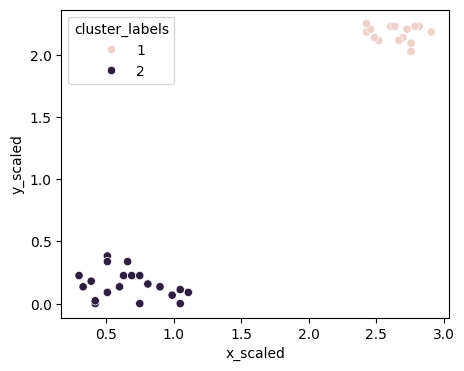

In [10]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(5,4))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Exercise - Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

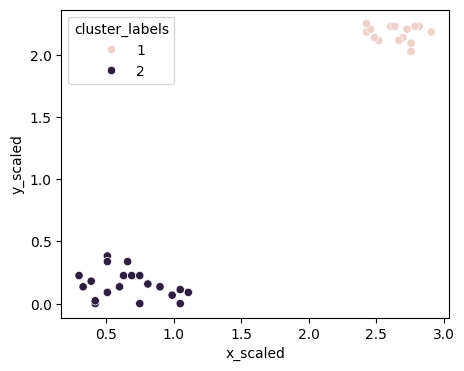

In [12]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(5,4))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

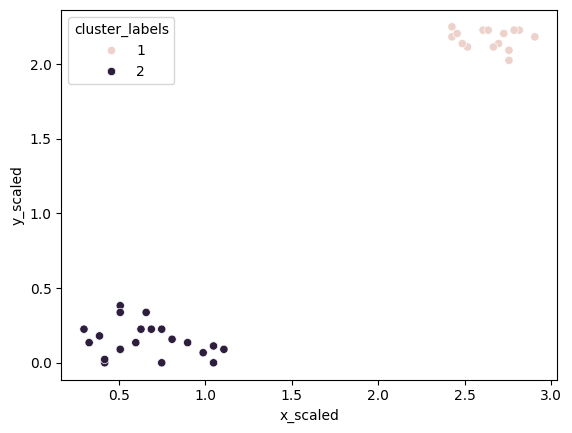

In [13]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled','y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(5,4))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## How many clusters?
**Introduction to dendrograms**
- Strategy till now - decide clusters on visual inspection
- Dendrograms help in showing progression as clusters are merged
- A dendrogram is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes

Create a dendrogram in SciPy

### Exercise - Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

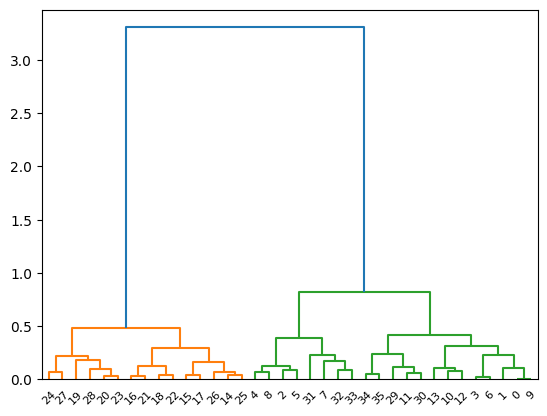

In [21]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

Notice the significant difference between the inter-cluster distances beyond the top two clusters.

## Limitations of hierarchical clustering
**Measuring speed in hierarchical clustering**
- `timeit` module
- Measure the speed of `.linkage()` method
- Use randomly genrated points
- Run various iterations to extrapolate

**Use of timeit module**

In [22]:
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit
points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points),
                   'y': random.sample(range(0, points), points)})
%timeit linkage(df[['x','y']], method = 'ward', metric = 'euclidean')

484 µs ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Exercise - FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:
- sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
- aggression: a number between 0-99 which signifies the commitment and will of a player

These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.ata.

In [46]:
from scipy.cluster.vq import whiten
fifa = pd.read_csv('datasets/fifa_18_dataset.csv')
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa = fifa.sample(15000, random_state=42).sort_index()
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,1.070924,3.609257
1,26,48,1.210610,2.749910
2,33,56,1.536544,3.208228
3,38,78,1.769353,4.468604
4,11,29,0.512181,1.661404


                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            3.038908           3.994996
2                            0.799954           1.830681
3                            1.862055           3.104539


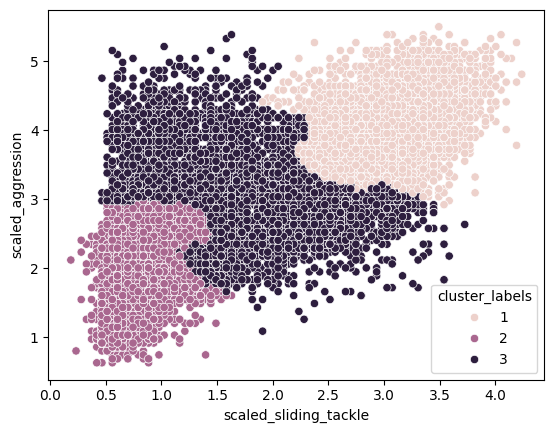

In [47]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()